# Stock Market Analysis for Tech Stocks

In this project, we'll analyse data from the stock market for some technology stocks. 

Again, we'll use Pandas to extract and analyse the information, visualise it, and look at different ways to analyse the risk of a stock, based on its performance history. 

Here are the questions we'll try to answer:

- What was the change in a stock's price over time?
- What was the daily return average of a stock?
- What was the moving average of various stocks?
- What was the correlation between daily returns of different stocks?
- How much value do we put at risk by investing in a particular stock?
- How can we attempt to predict future stock behaviour?

In [1]:
from __future__ import division
#Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
from pandas_datareader import data as pdr
from datetime import datetime
import yfinance as yf

yf.pdr_override()



In [2]:
#We're going to analyse stock info for Apple, Google, Microsoft, and Amazon
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [3]:
# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2019-01-02'
end_date = '2019-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
for stock in tech_list:
    globals() [stock] = pdr.DataReader(stock, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800
2019-01-08,149.559998,151.820007,148.520004,150.750000,147.766861,41025300


In [5]:
#Basic stats for Apple's Stock
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,207.542151,209.497650,205.939960,207.915737,205.625419,2.804224e+07
std,34.047409,34.143414,33.967037,34.182276,34.655155,1.084423e+07
min,143.979996,145.720001,142.000000,142.190002,139.376251,1.136200e+07
25%,185.035004,187.665001,183.295006,185.919998,183.374519,2.095990e+07
50%,203.119995,204.490005,201.559998,202.899994,200.682907,2.588170e+07
75%,222.534996,224.169998,220.579994,223.339996,221.544548,3.202875e+07
max,291.119995,293.970001,288.119995,291.519989,290.044617,9.131220e+07


In [6]:
#Some basic info about the dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-01-02 to 2019-12-30
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


### What's the change in stock's price over time?

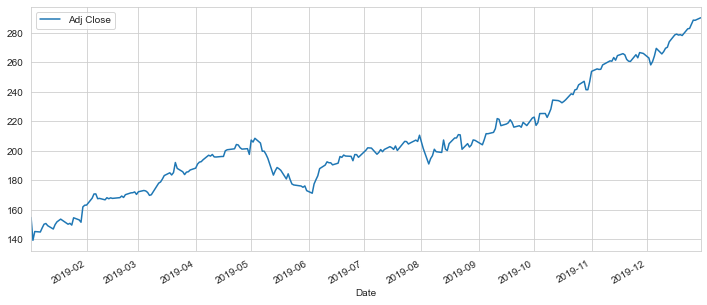

In [7]:
#Plotting the stock's adjusted closing price using pandas
AAPL['Adj Close'].plot(legend=True,figsize=(12,5))

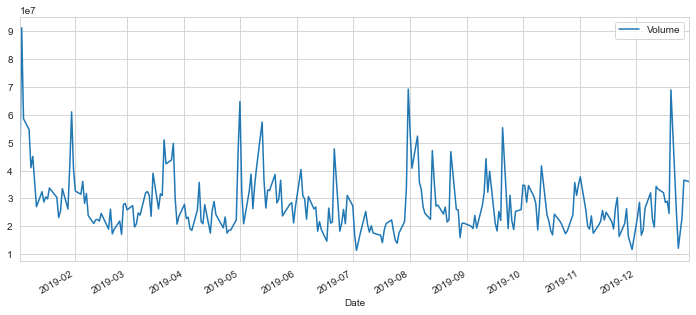

In [8]:
#Plotting the total volume being traded over time
AAPL['Volume'].plot(legend=True,figsize=(12,5))

### What was the moving average of various stocks?

Let's check out the moving average for stocks over a 10, 20 and 50 day period of time. We'll add that information to the stock's dataframe.

In [9]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [10]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.562683,24643000,275.531451,269.809557,258.097937
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.831299,12119700,277.102457,270.700026,259.075086
2019-12-26,284.820007,289.980011,284.700012,289.910004,288.442780,23280300,279.006769,271.974544,260.175377
2019-12-27,291.119995,293.970001,288.119995,289.799988,288.333313,36566500,280.831485,273.066986,261.292326
2019-12-30,289.459991,292.690002,285.220001,291.519989,290.044617,36028600,282.460199,274.274344,262.425447


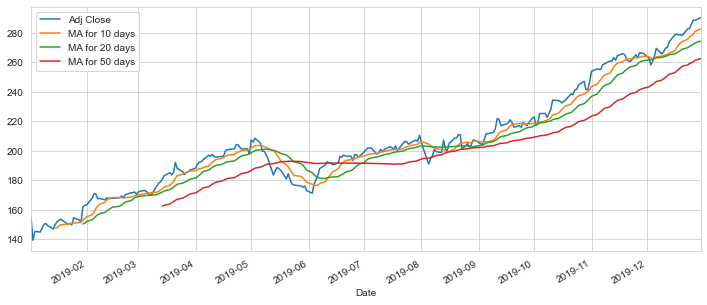

In [11]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

### What was the daily return average of a stock?

In [12]:
#The daily return column can be created by using the percentage change over the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [13]:
AAPL['Daily Return'].tail()

Date
2019-12-23    0.016318
2019-12-24    0.000951
2019-12-26    0.019840
2019-12-27   -0.000380
2019-12-30    0.005935
Name: Daily Return, dtype: float64

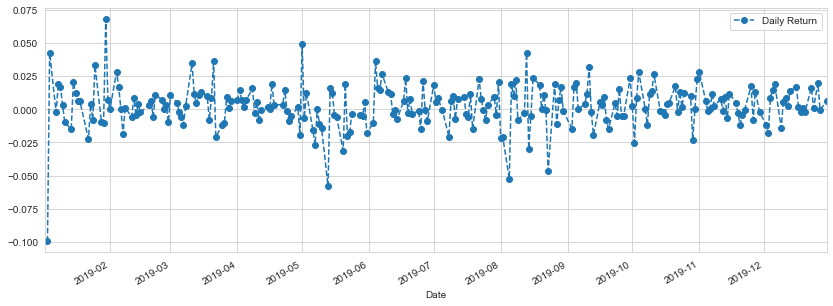

In [14]:
#Plotting the daily return
AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

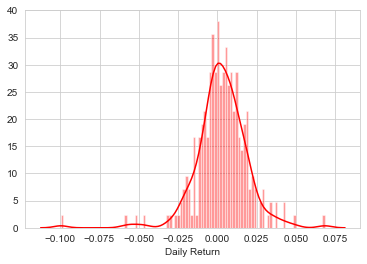

In [15]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')

### What was the correlation between daily returns of different stocks?

In [16]:
#Reading just the 'Adj Close' column this time
close_df = pdr.DataReader(tech_list, start_date, end_date)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [17]:
close_df.tail()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-12-23,282.562683,1793.000000,1348.839966,156.545242
2019-12-24,282.831299,1789.209961,1343.560059,156.515396
2019-12-26,288.442780,1868.770020,1360.400024,157.798309
2019-12-27,288.333313,1869.800049,1351.890015,158.086731
2019-12-30,290.044617,1846.890015,1336.140015,156.724243


In [18]:
rets_df = close_df.pct_change()

In [19]:
rets_df.tail()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-12-23,0.016318,0.003638,-0.000556,0.000000
2019-12-24,0.000951,-0.002114,-0.003914,-0.000191
2019-12-26,0.019840,0.044467,0.012534,0.008197
2019-12-27,-0.000380,0.000551,-0.006256,0.001828
2019-12-30,0.005935,-0.012253,-0.011650,-0.008619


Let's try creating a scatterplot to visualise any correlations between different stocks. First we'll visualise a scatterplot for the relationship between the daily return of a stock to itself.

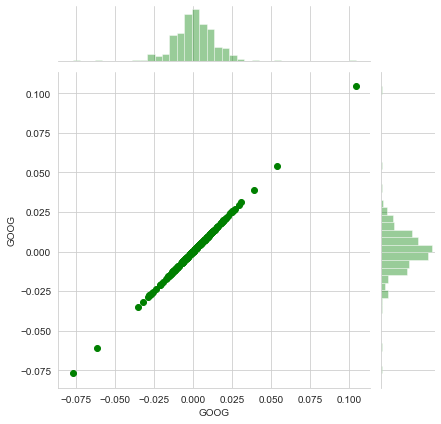

In [20]:
sns.jointplot('GOOG','GOOG',rets_df,kind='scatter',color='green')

As expected, the relationship is perfectly linear because we're trying to correlate something with itself. Now, let's check out the relationship between Google and Apple's daily returns.

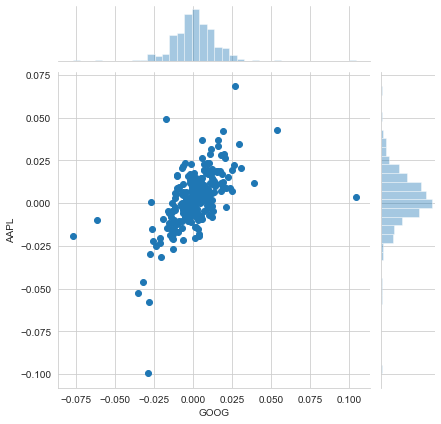

In [21]:
sns.jointplot('GOOG','AAPL',rets_df,kind='scatter')

There seems to be a minor correlation between the two stocks, looking at the figure above. The Pearson R Correlation Coefficient value of 0.45 echoes that sentiment.

But what about other combinations of stocks?

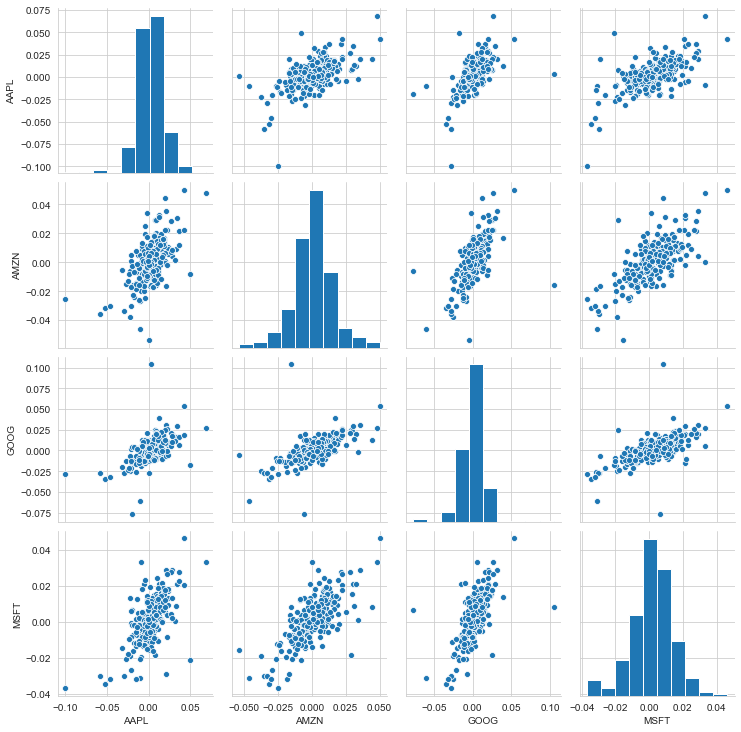

In [22]:
sns.pairplot(rets_df.dropna())

Quick and dirty overarching visualisation of the scatterplots and histograms of daily returns of our stocks. To see the actual numbers for the correlation coefficients, we can use seaborn's corrplot method.

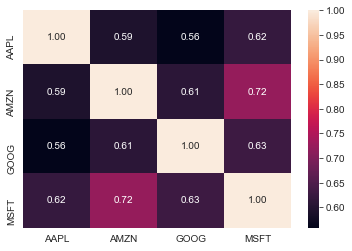

In [23]:
sns.heatmap(rets_df.dropna().corr(),annot=True,fmt='.2f')

### How much value do we put at risk by investing in a particular stock?

A basic way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns. 

In [24]:
rets = rets_df.dropna()

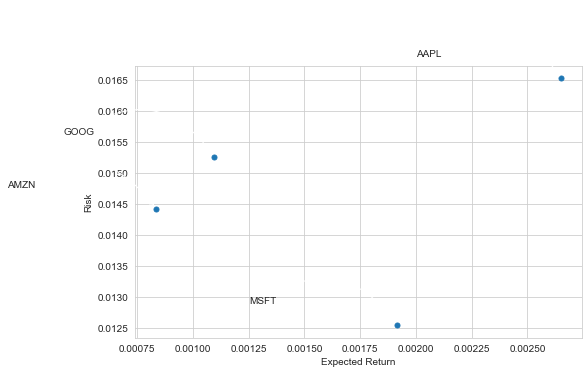

In [25]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))
    


### Value at Risk

We can treat _Value at risk_ as the amount of money we could expect to lose for a given confidence interval. We'll use the 'Bootstrap' method and the 'Monte Carlo Method' to extract this value.

__Bootstrap Method__

Using this method, we calculate the empirical quantiles from a histogram of daily returns. The quantiles help us define our confidence interval.

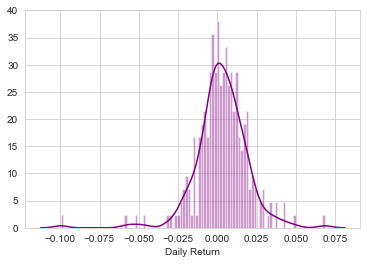

In [26]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

To recap, our histogram for Apple's stock looked like the above. And our daily returns dataframe looked like:

In [27]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-01-03,-0.099607,-0.025242,-0.028484,-0.036788
2019-01-04,0.042689,0.050064,0.053786,0.046509
2019-01-07,-0.002226,0.034353,-0.002167,0.001275
2019-01-08,0.019063,0.016612,0.007385,0.007251
2019-01-09,0.016982,0.001714,-0.001505,0.014300


In [28]:
#Using Pandas built in quantile method
rets['AAPL'].quantile(0.05)

-0.020665852720655953



### How can we attempt to predict future stock behaviour?

__Monte Carlo Method__



In [29]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [30]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

We're going to run the simulation of Google stocks. Let's check out the opening value of the stock.

In [31]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


Let's do a simulation of 100 runs, and plot them.

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

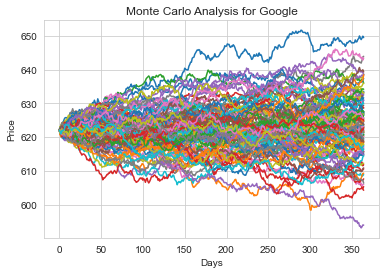

In [32]:
start_price = 622.049 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [33]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

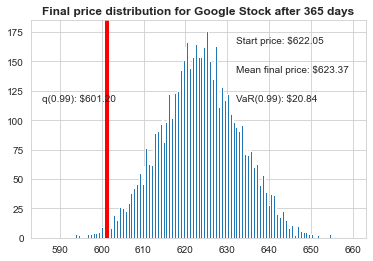

In [34]:
from scipy import stats

q = np.percentile(simulations,1)


plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')